# 0. Import bibliotek

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Ładowanie danych

## Informacja o atrybutach

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
data = pd.read_csv("mushrooms.csv")
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


# 2. Wstępne opisanie danych i brakujące wartości

In [4]:
data['class'].unique()

array(['p', 'e'], dtype=object)

**Mamy dwie klasyfikacje. Albo grzyb jest jadalny albo niejeadalny.**

In [5]:
data.shape

(8124, 23)

**Dataset składa się z 22 atrubutów (pierszy jest naszą etykietą) i 8124 instancji.**

### Sprawdźmy czy znajdują się jakieś null wartości

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Jak widać nasze dane nie posiadają brakujących wartości**

**Zobaczmy ile unikalnych wartości zawiera każda kolumna oraz która z nich występuje najczęściej**

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 3. Rysowanie wykresów

In [21]:
def graph(name, u):
#     data[name].value_counts().plot(kind="bar",ax=u, color=colors)
    data.groupby([name, 'class']).size().plot(kind="bar",ax=u, color=colors)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.grid(True)
    u.set_title(name.replace("-"," "), fontsize=16, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+100),
                   ha="center", va='center', fontsize=10, fontweight="bold")


Sporządźmy wykresy dla różnych atrybutów łodygi grzyba oraz jego etykietą.

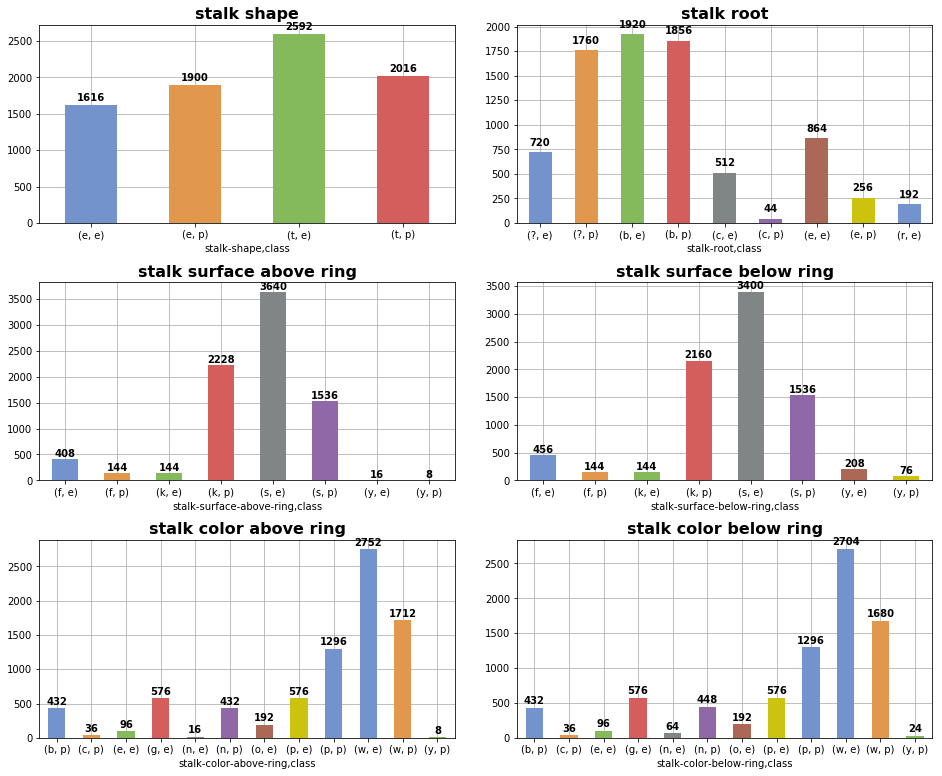

In [26]:
fig, ax2 = plt.subplots(3,2, figsize=(16, 12), gridspec_kw={"wspace" : 0.15, "hspace" : 0.3, "top": 0.95})

colors=["#7293cb","#e1974c","#84ba5b","#d35e5b","#808585","#9067a7","#ab6857","#ccc210"]

graph("stalk-shape",ax2[0,0])
graph("stalk-root",ax2[0,1])
graph("stalk-surface-above-ring",ax2[1,0])
graph("stalk-surface-below-ring",ax2[1,1])
graph("stalk-color-above-ring",ax2[2,0])
graph("stalk-color-below-ring",ax2[2,1])
plt.rcParams['axes.axisbelow'] = True

# 4. Przetwarzanie danych

Dataset zawiera dane jako string dlatego przekonwertujmy je na unikalne wartości liczbowe.

In [32]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column]).astype(float)

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


Podzielmy dataset na etykiety i atrybuty

In [164]:
X = data.iloc[:,1:23] 
y = data.iloc[:, 0]

X.head()
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: class, dtype: float64

**1 = trujący,
0 = jadalny**

In [34]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Zobaczmy jak wygląda korelacja pomiędzy kolumnami

In [35]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


### normalizacja danych

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

# 5. trenowanie modeli

Podzielmu nasze dane na zbiory treningowe oraz testowe

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

## Podstawowa regresja logistyczna

Ponieważ naszym zadaniem jest określenie czy grzyb jest jadalny czy trujący zamiast regresji liniowej użyjemy regresji logistycznej 

In [91]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression(solver='liblinear')

In [92]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
model_LR.score(X_test, y_test)

0.9581538461538461

Policzmy teraz jaki dostaniemy wynik jeśli weźmiemy prawdopodobieństwa zwracane przez nasz model i jeżeli predykcja jest powyżej lub poniżej to przypiszemy ją do konkretej klasy.

In [94]:
y_prob = model_LR.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
model_LR.score(X_test, y_pred)

1.0

Zobaczmy jak wygląda tablica pomyłek.


|     _     | pozytywna | negatywna |
|:---------:|-----------|-----------|
| pozytywna | TP        | FP        |
| pozytywna | FN        | TN        |

In [95]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]])

Nasz model zwrócił nam  
31 fałszywie pozytywnych wyników  
37 fałszywie negatywnych wyników  

In [240]:
metrics.roc_auc_score(y_test,y_pred)

0.9728303747534518

Policzmy teraz krzywą AUC - ROC 
jest pomiarem wydajności dla problemu klasyfikacji przy różnych ustawieniach progów. ROC jest krzywą prawdopodobieństwa, a AUC reprezentuje stopień lub miarę separowalności. Mówi, na ile model potrafi rozróżnić klasy.

In [239]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9916249431042331

Zobaczmy jak wygląda ona na wykresie

Text(0.5, 0, 'False Positive Rate')

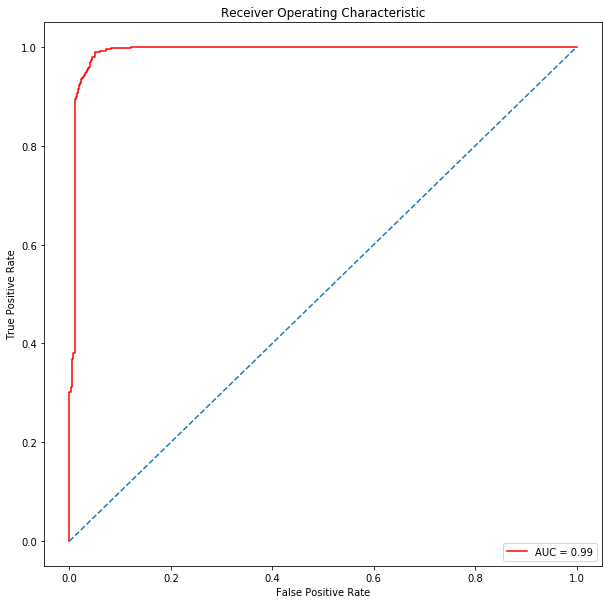

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Zobaczmy jakie współczynniki zostały przypisane każdemu z atrybutów pokazujać to na grafie

Text(0.5, 1.0, 'Classification - features (importance)')

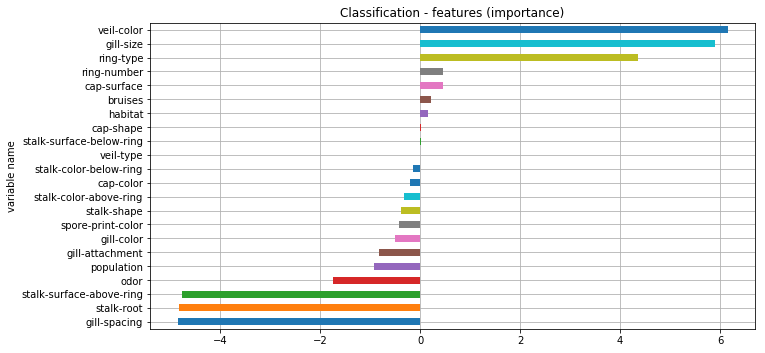

In [116]:
values = model_LR.coef_[0]
names = data.drop(['class'], axis=1).columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

importance["value"].plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - features (importance)")

## Regresja logistyczna (model dostrojony)

L1 i L2 są parametrami regularyzacji. Używane są w celu uniknięcia overfitingu. Zarówno regulacja L1, jak i L2 zapobiega nadmiernemu dopasowaniu przez obkurczanie (nakładanie kary) na współczynniki.
L1 jest pierwszą normą momentu | x1-x2 |, która jest po prostu bezwzględną wartością między dwoma punktami, gdzie L2 jest normą drugiego momentu odpowiadającą odległości euklidesowej, która jest | x1-x2 | ^ 2 (| w | ^ 2 dla przypadku regularyzacji). 
W prostych słowach, L2 (Ridge) zmniejsza cały współczynnik o takie same proporcje, ale żadnego nie eliminuje, podczas gdy L1 (Lasso) może zmniejszyć niektóre współczynniki do zera, wykonując selekcje zmiennych. 
Jeśli wszystkie cechy są skorelowane z etykietą, Ridge przewyższa Lasso, ponieważ współczynniki nigdy nie są zerowe w Ridge. Jeśli tylko podzbiór cech jest skorelowany z etykietą, Lasso wyprzedza Ridge, w modelu Lasso pewine współczynniki mogą zostać zmiejszone do zera.

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression(solver='liblinear')

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1', 'l2']
                   }

Wyszukiwanie siatkowe dostarczone przez GridSearchCV wyczerpująco generuje kandydatów z siatki wartości parametrów określonych za pomocą tuned_parameter. GridSearchCV implementuje zwykły interfejs API estymatora: gdy "dopasowujemy" go do zbioru danych, wszystkie możliwe kombinacje wartości parametrów są oceniane i najlepsza kombinacja jest zachowany.

In [227]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [228]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [229]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l2'}


**Jak widać lepszą jest regularyzacja L2 dla parametru C = 100**

In [230]:
y_prob = LR.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)
LR.score(X_test, y_pred)

1.0

Sprawdzmy tablice pomyłek

In [231]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]])

Sprawdzmy jak wyglądają niektóre metryki naszego modelu

In [232]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       845
         1.0       0.97      0.97      0.97       780

   micro avg       0.97      0.97      0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [237]:
metrics.roc_auc_score(y_test,y_pred)

0.9728303747534518

Policzmy teraz krzywą AUC - ROC

In [238]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9916249431042331

Zobaczmy jak wygląda ona na wykresie

Text(0.5, 0, 'False Positive Rate')

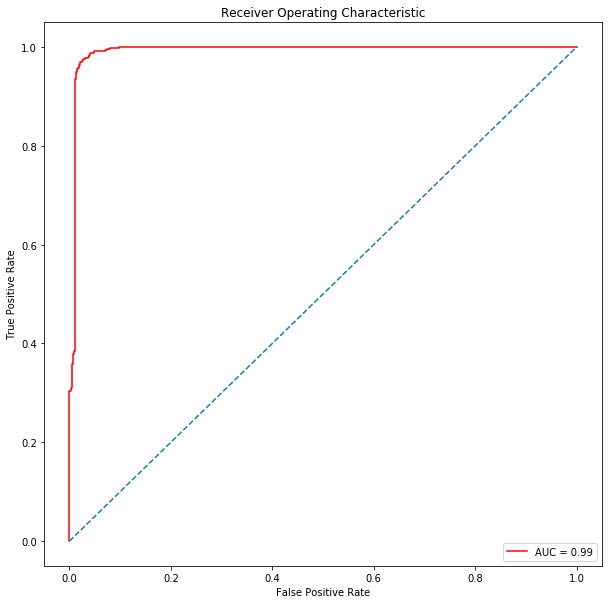

In [235]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Zobaczmy jakie współczynniki zostały przypisane każdemu z atrybutów pokazujać to na grafie

Text(0.5, 1.0, 'Classification - features (importance)')

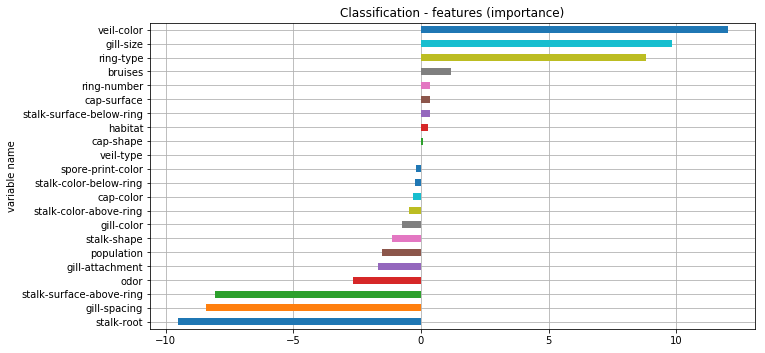

In [236]:
values = LR.best_estimator_.coef_[0]
names = data.drop(['class'], axis=1).columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

importance["value"].plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - features (importance)")

## Random Forest

Random decision forests jest zestawem metod uczenia dla klasyfikacji, regresji i innych zadań, które działają poprzez konstruowanie wielu drzew decyzyjnych w czasie treningu i wyprowadzanie klasy, która jest trybem klas (klasyfikacja) lub średnią prognozą (regresją) poszczególnych drzew. Ma nawyki do overfittingu.

In [210]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier(n_estimators=10)

Przećwiczmy nasz model

In [211]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [212]:
y_prob = model_RR.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_RR.score(X_test, y_pred)

1.0

Sprawdzmy tablice pomyłek

In [213]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

oraz policzmy krzywą AUC - ROC

In [215]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       845
         1.0       1.00      1.00      1.00       780

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [216]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [221]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Zobaczmy jak wygląda ona na wykresie

Text(0.5, 0, 'False Positive Rate')

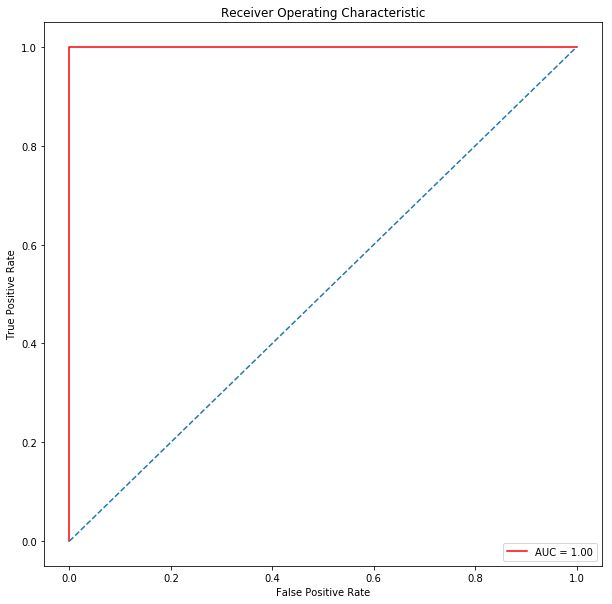

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Jak widać Random Forest daje nam najlepsze, potrafi w 100% dokonać predykcji czy dany grzyb jest trujący.
Jeżeli mielibyśmy porównać regresje logiczną to widzimy że wraz ze zmianą z deafultowego 1 na 100 zmieniły nam sie współczynniki prze atrybutach a co za tym idzie poprawiła się nasza skuteczność.